# Machine Learning in Agriculture

Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

Attribute Information:
    
* ID : UniqueId
* Estimated_Insectes_Count : Estimated insects count per square meter
* Crop_Type : Category of Crop(0,1)   
* Soil_Type : Category of Soil(0,1)
* Pesticide_Use_Category : Type of pesticides used(1-Never,2-Previously Used,3-Currently Using)
* Number_Doses_Week : Number of doses per week
* Number_Weeks_Used : Number of weeks used
* Number_Weeks_Quit : Number of weeks quit
* Season : Season Category (1,2,3)
* Crop_Damage : Crop Damage Category(0=alive, 1=Damage due to other causes,2=Damage due to Pesticides)      

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
df=pd.read_csv('agriculture .csv')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [46]:
df.drop(['ID'],axis=1,inplace=True)  #Since it is of no use in the dataset

In [47]:
df.shape

(4599, 9)

In [48]:
df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [49]:
df.dtypes

Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [50]:
df.nunique()

Estimated_Insects_Count    71
Crop_Type                   2
Soil_Type                   2
Pesticide_Use_Category      3
Number_Doses_Week          20
Number_Weeks_Used          63
Number_Weeks_Quit          47
Season                      3
Crop_Damage                 3
dtype: int64

In [51]:
df['Crop_Type'].value_counts(normalize=True)*100

0    77.516851
1    22.483149
Name: Crop_Type, dtype: float64

In [52]:
df['Soil_Type'].value_counts(normalize=True)*100

0    52.337465
1    47.662535
Name: Soil_Type, dtype: float64

In [53]:
df['Pesticide_Use_Category'].value_counts(normalize=True)*100

2    69.689063
3    29.332464
1     0.978474
Name: Pesticide_Use_Category, dtype: float64

In [54]:
df['Season'].value_counts(normalize=True)*100

2    50.597956
1    29.984779
3    19.417265
Name: Season, dtype: float64

In [55]:
df['Number_Doses_Week'].value_counts(normalize=True)*100 

20    26.331811
40    14.285714
30    12.698413
10    11.676451
15     8.545336
5      5.827354
25     5.718634
60     5.153294
50     3.739943
35     2.196130
45     1.152424
0      0.978474
80     0.782779
70     0.369646
55     0.239182
90     0.108719
85     0.086975
65     0.065232
75     0.021744
95     0.021744
Name: Number_Doses_Week, dtype: float64

In [56]:
#Checking for Null values
df.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

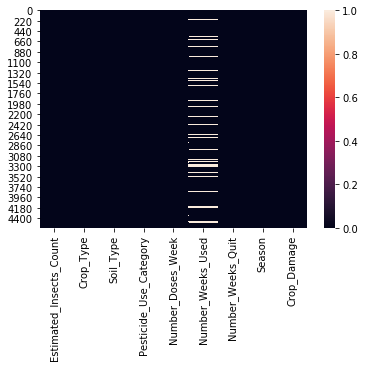

In [57]:
sns.heatmap(df.isnull())

In [58]:
#Filling missing values
df['Number_Weeks_Used']=df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mean())

In [59]:
cols=['Estimated_Insects_Count','Crop_Type','Soil_Type','Pesticide_Use_Category',
     'Season','Crop_Damage']
df.groupby(['Crop_Type'])[cols].mean()


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,Crop_Damage
Crop_Type,,,,,,
0,1379.188780,0.0,0.523703,2.194670,1.894530,0.189060
1,1307.186654,1.0,0.314313,2.589942,1.893617,0.212766


In [60]:
df.groupby(['Soil_Type'])[cols].mean()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,Crop_Damage
Soil_Type,,,,,,
0,1480.965517,0.294558,0.0,2.273785,1.886996,0.220191
1,1233.464872,0.148266,1.0,2.294252,1.902372,0.166058


In [61]:
df.groupby(['Pesticide_Use_Category'])[cols].mean()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,Crop_Damage
Pesticide_Use_Category,,,,,,
1,1719.244444,0.533333,0.488889,1.0,1.888889,0.955556
2,1367.947582,0.117317,0.468955,2.0,1.890484,0.111700
3,1339.363232,0.469978,0.494440,3.0,1.903632,0.365456


In [62]:
df.groupby(['Crop_Damage'])[cols].mean()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Season,Crop_Damage
Crop_Damage,,,,,,
0,1282.352094,0.220157,0.490314,2.242147,1.898429,0.0
1,1772.251506,0.250000,0.412651,2.463855,1.882530,1.0
2,1678.947826,0.234783,0.391304,2.617391,1.826087,2.0


In [63]:
df['Number_Weeks_Used'].isnull().sum()

0

In [64]:
df['Crop_Damage'].value_counts(normalize=True)*100
#Majority of the crops are alive
#14% of the crops are damaged due to other causes
#2% of the crops are damaged due to pesticides

0    83.061535
1    14.437921
2     2.500544
Name: Crop_Damage, dtype: float64

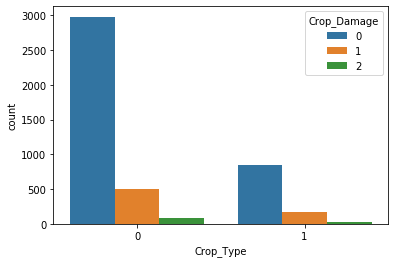

In [65]:
sns.countplot(x='Crop_Type',hue='Crop_Damage',data=df)

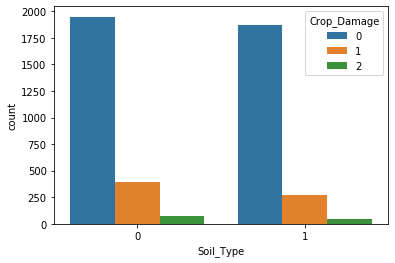

In [66]:
sns.countplot(x='Soil_Type',hue='Crop_Damage',data=df)

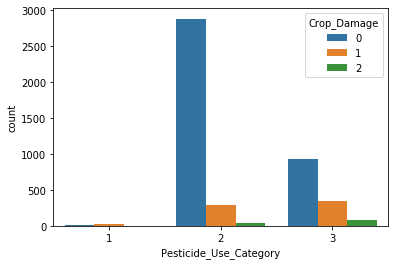

In [67]:
sns.countplot(x='Pesticide_Use_Category',hue='Crop_Damage',data=df)

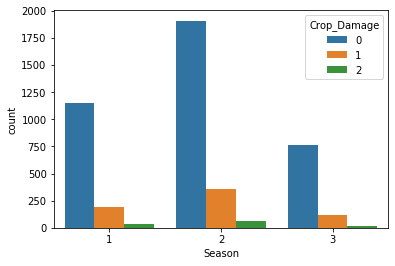

In [68]:
sns.countplot(x='Season',hue='Crop_Damage',data=df)
#Majority of the crops are alive and damaged in season 2

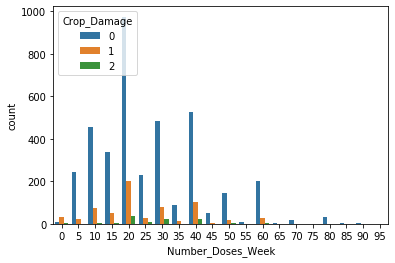

In [69]:
sns.countplot(x='Number_Doses_Week',hue='Crop_Damage',data=df)

In [70]:
df['Number_Doses_Week'].nunique() 

20

#Majority of the crops grown are Type 0 with Soil Type 0.among them 2.5% of them are damaged due to use of Pesticide 3 and 14% due to other reasons

In [71]:
df.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

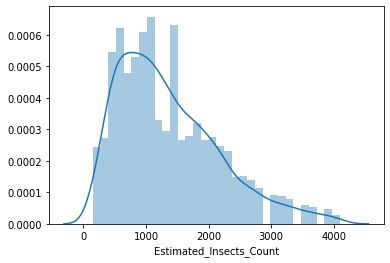

In [72]:
sns.distplot(df['Estimated_Insects_Count'])

In [73]:
df['Estimated_Insects_Count']=np.log(df['Estimated_Insects_Count'])

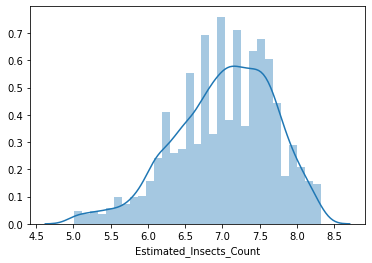

In [74]:
sns.distplot(df['Estimated_Insects_Count'])

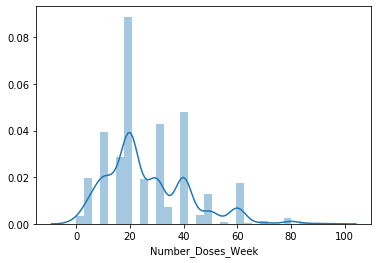

In [75]:
sns.distplot(df['Number_Doses_Week'])

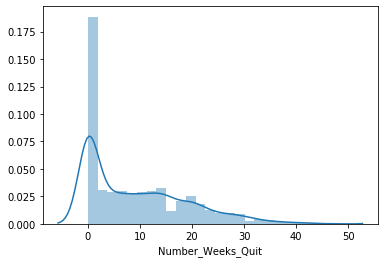

In [76]:
sns.distplot(df['Number_Weeks_Quit'])

In [77]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.065801,-0.129189,-0.068835,-0.090454,0.430107,0.280232,-0.011274,0.188351
Crop_Type,-0.065801,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.129189,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.068835,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.090454,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.430107,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.280232,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.011274,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.188351,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


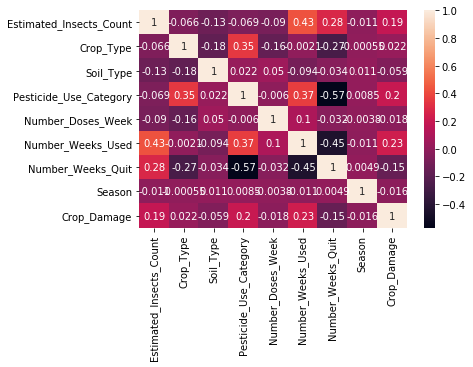

In [78]:
sns.heatmap(df.corr(),annot=True)

In [79]:
df.drop(['Number_Weeks_Used','Number_Weeks_Quit'],axis=1,inplace=True)

In [80]:
#Split the data
x=df.drop(['Crop_Damage'],axis=1)
y=df['Crop_Damage']


In [89]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
x= sc.fit_transform(x)

In [90]:
 #Importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,auc


In [91]:
max_acc_score=0
for i in range(42,101):
    r_state=i
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
    mnb = MultinomialNB()
    mnb.fit(x_train,y_train)
    pred=mnb.predict(x_test)
    acc_score=accuracy_score(y_test,pred)
    print("The accuracy score for",i, " is" ,acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
        
print("The maximum accuracy score ",final_r_state," is ",max_acc_score)     

The accuracy score for 42  is 0.8228260869565217
The accuracy score for 43  is 0.8521739130434782
The accuracy score for 44  is 0.8228260869565217
The accuracy score for 45  is 0.8206521739130435
The accuracy score for 46  is 0.8369565217391305
The accuracy score for 47  is 0.8282608695652174
The accuracy score for 48  is 0.8173913043478261
The accuracy score for 49  is 0.8141304347826087
The accuracy score for 50  is 0.842391304347826
The accuracy score for 51  is 0.8489130434782609
The accuracy score for 52  is 0.8217391304347826
The accuracy score for 53  is 0.85
The accuracy score for 54  is 0.8206521739130435
The accuracy score for 55  is 0.8217391304347826
The accuracy score for 56  is 0.8358695652173913
The accuracy score for 57  is 0.8
The accuracy score for 58  is 0.8173913043478261
The accuracy score for 59  is 0.8369565217391305
The accuracy score for 60  is 0.8173913043478261
The accuracy score for 61  is 0.8293478260869566
The accuracy score for 62  is 0.8315217391304348
T

In [92]:
#Finalizing the tain_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=43,test_size=0.20)

#Using GridSearchCV to select the best parameter

In [93]:
#best parameters for KNN

from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
grid_param ={'n_neighbors':range(1,30)}
gd=GridSearchCV(knn,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 19}

In [94]:
#best parameters for DecisionTree

dtc=DecisionTreeClassifier()
grid_param ={'criterion': ['gini', 'entropy']}
gd=GridSearchCV(dtc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [99]:
#best parameters for SVC

svc = SVC()
grid_param ={'kernel': ('linear','poly','rbf'), 'C':[1,10]}
gd=GridSearchCV(svc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'C': 1, 'kernel': 'rbf'}

In [95]:
#best parameters for RandomForest

rfc=RandomForestClassifier()
grid_param={"n_estimators":[10,100,500,1000]}
gd=GridSearchCV(rfc,grid_param)
gd.fit(x_train,y_train)
gd.best_params_

{'n_estimators': 500}

In [100]:
#Testing the models with the best parameters calculated

model=[]
score=[]
cvs=[]

for i in [MultinomialNB(),KNeighborsClassifier(n_neighbors=19),DecisionTreeClassifier(criterion='entropy'),SVC(kernel='rbf',C=1),RandomForestClassifier(n_estimators=500)]:
    model.append(i)
    print('\n')
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    pred=i.predict(x_test)
    ac=accuracy_score(y_test,pred)
    print('Accuracy score of',i,'is:',ac)
    score.append(ac)
    print('\n')
    cv_score=cross_val_score(i,x,y,cv=5,scoring='accuracy').mean()
    print('The CV Score is', cv_score)
    cvs.append(cv_score)
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print('\n')
    print(classification_report(y_test,pred))
    print('\n')




Accuracy score of MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) is: 0.8521739130434782


The CV Score is 0.8306155083502862


[[784   0   0]
 [111   0   0]
 [ 25   0   0]]


              precision    recall  f1-score   support

           0       0.85      1.00      0.92       784
           1       0.00      0.00      0.00       111
           2       0.00      0.00      0.00        25

    accuracy                           0.85       920
   macro avg       0.28      0.33      0.31       920
weighted avg       0.73      0.85      0.78       920





Accuracy score of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform') is: 0.8478260869565217


The CV Score is 0.8119203292804087


[[775   9   0]
 [106   5   0]
 [ 21   4   0]]


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       784
 

In [101]:
result=pd.DataFrame({'Model':['MultinomialNB','KNeighborsClassifier','DecisionTreeClassifier','SVC','RandomForestClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs})
result

,Model,Accuracy_Score,Cross_val_score
0,MultinomialNB,0.852174,0.830616
1,KNeighborsClassifier,0.847826,0.811920
2,DecisionTreeClassifier,0.789130,0.736473
3,SVC,0.854348,0.834311
4,RandomForestClassifier,0.814130,0.766040


Since SVC is giving better results,we finalize the same.

Saving the model

In [102]:
from sklearn.externals import joblib
joblib.dump(svc,'ag.rfc')

['ag.rfc']